<h3><b>Flipr Hackathon ML Task- Artificial Neural Network</b></h3>
The main algorithm used for the first part of the COVID-19 question is an Artificial Neural Network.

In [1]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


<h1><b>Preprocessing the Training Dataset</b></h1>

In [2]:
traindf = pd.read_excel("C:/Users/Dell/Desktop/Flipr ML/Train_dataset.xlsx", sheet_name = "Train_dataset")
testdf = pd.read_excel("C:/Users/Dell/Desktop/Flipr ML/Test_dataset.xlsx", sheet_name = "Test_dataset")

In [3]:
traindf.head()

people_ID        Region  Gender Designation             Name Married  \
0          1  Bhubaneshwar  Female         Mrs            mansi     YES   
1          2  Bhubaneshwar  Female         Mrs        riya masi     YES   
2          3  Bhubaneshwar  Female         Mrs           sunita      NO   
3          4  Bhubaneshwar  Female         Mrs   anjali @ babli     YES   
4          5  Bhubaneshwar  Female         Mrs  champa karketta      NO   

   Children     Occupation Mode_transport  cases/1M  ...    HBB d-dimer  \
0       1.0         Farmer         Public         2  ...   93.0   233.0   
1       2.0         Farmer           Walk         2  ...   56.0   328.0   
2       1.0        Cleaner         Public         2  ...  137.0   213.0   
3       1.0         Driver            Car         2  ...  167.0   275.0   
4       2.0  Manufacturing            Car         2  ...  153.0   331.0   

   Heart rate  HDL cholesterol Charlson Index Blood Glucose  Insurance  \
0        82.0             58.0             27             7  3600000.0   
1        89.0             68.0              5             6  1600000.0   
2        77.0             43.0             40             6  3400000.0   
3        64.0             60.0             27             7   700000.0   
4        71.0             64.0             32             7  3200000.0   

    salary  FT/month  Infect_Prob  
0  1300000       2.0    49.135010  
1   400000       1.0    51.147880  
2   900000       1.0    73.224000  
3  2300000       1.0    48.779225  
4  1100000       1.0    87.868800  

[5 rows x 28 columns]

In [4]:
testdf.head()

people_ID Region  Gender Designation                Name Married  Children  \
0       5942  Delhi  Female         Mrs  smt rekha prajapat     YES         2   
1      18664  Delhi    Male          Mr              nirmal     YES         2   
2       5603  Delhi  Female         Mrs               pinky     YES         2   
3       5649  Delhi  Female         Mrs       pooja @aafrin     YES         2   
4       5099  Delhi  Female         Mrs              anjali     YES         2   

  Occupation Mode_transport  cases/1M  ...  Platelets  HBB  d-dimer  \
0     Driver         Public         4  ...        153  196      240   
1      Legal           Walk         4  ...         95  138      241   
2      Sales            Car         4  ...         40  166      236   
3      Sales            Car         4  ...         78   83      211   
4   Business            Car         4  ...        109  207      312   

   Heart rate HDL cholesterol Charlson Index  Blood Glucose  Insurance  \
0          85              53             17              3    3900000   
1          81              61              2              5    1800000   
2          88              47             24              3    5000000   
3          87              52             13              6    3100000   
4          94              68             39              5    2300000   

    salary  FT/month  
0  1300000         1  
1  1300000         1  
2  2000000         2  
3   600000         2  
4  1500000         1  

[5 rows x 27 columns]

Some attributes from the dataset are dropped which are known to have no effect on the probability of getting the desease. The columns being dropping are: <br>
    Name,Designation,People_ID,Region,Occupation,Insurance,Salary.

In [5]:
traindf=traindf.drop('Name',axis=1)
traindf=traindf.drop('Designation',axis=1)
traindf=traindf.drop('people_ID',axis=1)
traindf=traindf.drop('Region',axis=1)
traindf=traindf.drop('Occupation',axis=1)
traindf=traindf.drop('Insurance',axis=1)
traindf=traindf.drop('salary',axis=1)

testdf=testdf.drop('Name',axis=1)
testdf=testdf.drop('Designation',axis=1)
testdf=testdf.drop('people_ID',axis=1)
testdf=testdf.drop('Region',axis=1)
testdf=testdf.drop('Occupation',axis=1)
testdf=testdf.drop('Insurance',axis=1)
testdf=testdf.drop('salary',axis=1)

In [6]:
traindf.columns

Index(['Gender', 'Married', 'Children', 'Mode_transport', 'cases/1M',
       'Deaths/1M', 'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'FT/month', 'Infect_Prob'],
      dtype='object')

In [7]:
traindf.head()

Gender Married  Children Mode_transport  cases/1M  Deaths/1M  \
0  Female     YES       1.0         Public         2          0   
1  Female     YES       2.0           Walk         2          0   
2  Female      NO       1.0         Public         2          0   
3  Female     YES       1.0            Car         2          0   
4  Female      NO       2.0            Car         2          0   

              comorbidity  Age  Coma score Pulmonary score  ... Diuresis  \
0            Hypertension   68           8            <400  ...    441.0   
1                Diabetes   64          15            <100  ...      NaN   
2                    None   19          13            <300  ...    416.0   
3  Coronary Heart Disease   33           9            <200  ...    410.0   
4                Diabetes   23           7            <400  ...    390.0   

   Platelets    HBB  d-dimer  Heart rate  HDL cholesterol  Charlson Index  \
0      154.0   93.0    233.0        82.0             58.0              27   
1      121.0   56.0    328.0        89.0             68.0               5   
2      124.0  137.0    213.0        77.0             43.0              40   
3       98.0  167.0    275.0        64.0             60.0              27   
4       21.0  153.0    331.0        71.0             64.0              32   

   Blood Glucose  FT/month  Infect_Prob  
0              7       2.0    49.135010  
1              6       1.0    51.147880  
2              6       1.0    73.224000  
3              7       1.0    48.779225  
4              7       1.0    87.868800  

[5 rows x 21 columns]

In [8]:
testdf.head()

Gender Married  Children Mode_transport  cases/1M  Deaths/1M comorbidity  \
0  Female     YES         2         Public         4          1    Diabetes   
1    Male     YES         2           Walk         4          1    Diabetes   
2  Female     YES         2            Car         4          1    Diabetes   
3  Female     YES         2            Car         4          1        None   
4  Female     YES         2            Car         4          1    Diabetes   

   Age  Coma score Pulmonary score cardiological pressure  Diuresis  \
0   52           3            <200               Stage-01       388   
1   53          11            <200               Stage-01       409   
2   35           9            <100               Stage-02       440   
3   31          12            <300               Elevated       206   
4   51           6            <200               Stage-01       229   

   Platelets  HBB  d-dimer  Heart rate  HDL cholesterol  Charlson Index  \
0        153  196      240          85               53              17   
1         95  138      241          81               61               2   
2         40  166      236          88               47              24   
3         78   83      211          87               52              13   
4        109  207      312          94               68              39   

   Blood Glucose  FT/month  
0              3         1  
1              5         1  
2              3         2  
3              6         2  
4              5         1

As many values in the dataset are missing, We can either remove all the rows with missing values or put our own values in place of the missing values
<br>
<br>
SimpleImputer is used for putting our own values in place of the missing ones.The missing values are replaced with the <b>Most Frequent</b> values of the particular column

In [9]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit(traindf)
traindf = imp_mean.transform(traindf)

For the Training Dataset, we split into X and Y regions, X representing all the independent variables(all columns except infect_prob) and Y represnting all the dependent variables(The last column)

In [10]:
traindf_X=traindf[:,:-1]
traindf_Y=traindf[:,-1]

In [11]:
np.set_printoptions(threshold=np.inf)

For the 'Pulmonary Score' column, the values are given as Strings, so the first charecter of the string is spliced and the rest is converted into an Integer

In [12]:
for i in range(len(traindf_X)):
    traindf_X[i,9]=int(traindf_X[i,9][1:])


It is known that an Artificial Neural Network cannot handle String values. So all String values have to be encoded to a number.
For the 'Gender' and 'Married' columns, there are only 2 string values possible, so simple LabelEncoder is applied to encode the values to 0 and 1.

In [13]:
labelEncoder_X=LabelEncoder()
traindf_X[:,0]=labelEncoder_X.fit_transform(traindf_X[:,0])
traindf_X[:,1]=labelEncoder_X.fit_transform(traindf_X[:,1])



In [14]:
traindf_X

array([[0, 1, 1.0, 'Public', 2, 0, 'Hypertension', 68, 8, 400, 'Normal',
        441.0, 154.0, 93.0, 233.0, 82.0, 58.0, 27, 7, 2.0],
       [0, 1, 2.0, 'Walk', 2, 0, 'Diabetes', 64, 15, 100, 'Stage-02',
        390.0, 121.0, 56.0, 328.0, 89.0, 68.0, 5, 6, 1.0],
       [0, 0, 1.0, 'Public', 2, 0, 'None', 19, 13, 300, 'Elevated',
        416.0, 124.0, 137.0, 213.0, 77.0, 43.0, 40, 6, 1.0],
       [0, 1, 1.0, 'Car', 2, 0, 'Coronary Heart Disease', 33, 9, 200,
        'Stage-01', 410.0, 98.0, 167.0, 275.0, 64.0, 60.0, 27, 7, 1.0],
       [0, 0, 2.0, 'Car', 2, 0, 'Diabetes', 23, 7, 400, 'Normal', 390.0,
        21.0, 153.0, 331.0, 71.0, 64.0, 32, 7, 1.0],
       [0, 1, 1.0, 'Public', 2, 0, 'None', 35, 9, 100, 'Stage-02', 389.0,
        139.0, 86.0, 216.0, 94.0, 38.0, 5, 5, 2.0],
       [0, 1, 2.0, 'Car', 2, 0, 'Coronary Heart Disease', 61, 3, 400,
        'Normal', 390.0, 75.0, 156.0, 311.0, 99.0, 68.0, 23, 5, 1.0],
       [0, 1, 1.0, 'Public', 2, 0, 'Diabetes', 49, 10, 200, 'Stage-01',
   

In [15]:
data=['Gender', 'Married', 'Children', 'Mode_transport', 'cases/1M',
       'Deaths/1M', 'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'FT/month']

We change the traindf_X array back to dataframe with the respective columns to help in One Hot Encoding 

In [16]:
traindf_X=pd.DataFrame(data=traindf_X,columns=data)

In [17]:
traindf_X

Gender Married Children Mode_transport cases/1M Deaths/1M  \
0          0       1        1         Public        2         0   
1          0       1        2           Walk        2         0   
2          0       0        1         Public        2         0   
3          0       1        1            Car        2         0   
4          0       0        2            Car        2         0   
5          0       1        1         Public        2         0   
6          0       1        2            Car        2         0   
7          0       1        1         Public        2         0   
8          0       1        2         Public        2         0   
9          0       1        1         Public        2         0   
10         0       1        1         Public        2         0   
11         0       1        0            Car        2         0   
12         0       0        2         Public        2         0   
13         0       1        2         Public        2         0   
14         0       1        2         Public        2         0   
15         0       1        1           Walk        2         0   
16         0       1        2         Public        2         0   
17         0       1        0           Walk        2         0   
18         0       1        1         Public        2         0   
19         0       1        2         Public        2         0   
20         0       1        0            Car        2         0   
21         0       0        2         Public        2         0   
22         0       0        2         Public        2         0   
23         0       1        1            Car        2         0   
24         0       0        2            Car        2         0   
25         0       1        0         Public        2         0   
26         0       1        2         Public        2         0   
27         0       1        1         Public        2         0   
28         0       1        2         Public        2         0   
29         0       1        1            Car        2         0   
...      ...     ...      ...            ...      ...       ...   
10684      1       1        0           Walk        8         2   
10685      1       1        2            Car        8         2   
10686      1       1        0         Public        8         2   
10687      1       1        0         Public        8         2   
10688      1       1        2            Car        8         2   
10689      1       1        1            Car        8         2   
10690      1       0        2            Car        8         2   
10691      1       1        1         Public        8         2   
10692      1       1        0            Car        8         2   
10693      1       0        2         Public        8         2   
10694      1       1        0           Walk        8         2   
10695      1       1        0           Walk        8         2   
10696      1       1        1           Walk        8         2   
10697      1       1        2         Public        8         2   
10698      1       0        1            Car        8         2   
10699      1       1        2         Public        8         2   
10700      1       1        1           Walk        8         2   
10701      1       1        0         Public        8         2   
10702      1       1        1            Car        8         2   
10703      1       1        2         Public        8         2   
10704      1       1        2           Walk        8         2   
10705      1       1        2         Public        8         2   
10706      1       1        2         Public        8         2   
10707      1       0        2            Car        8         2   
10708      1       1        1         Public        8         2   
10709      1       0        2            Car        8         2   
10710      1       1        0            Car        8         2   
10711      1       1        0         Public        8

In One Hot Encoding, basically the column having the String values is split up into multiple columns(the number of columns depends on the number of unique values in the column). Each column contains a 1 or 0 depending on whether on not that particular String is in the column
To escape the dummy variable trap, we drop the first one hot encoded column of the column which is encoded.

In [18]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

The columns of the dataframe which have integers are typecasted as Integer columns. The columns with String values are Object columns

In [19]:
traindf_X['Gender'] = pd.to_numeric(traindf_X['Gender'])
traindf_X['Married'] = pd.to_numeric(traindf_X['Married'])
traindf_X['Children'] = pd.to_numeric(traindf_X['Children'])
traindf_X['cases/1M'] = pd.to_numeric(traindf_X['cases/1M'])
traindf_X['Deaths/1M'] = pd.to_numeric(traindf_X['Deaths/1M'])
traindf_X['Age'] = pd.to_numeric(traindf_X['Age'])
traindf_X['Coma score'] = pd.to_numeric(traindf_X['Coma score'])
traindf_X['Pulmonary score'] = pd.to_numeric(traindf_X['Pulmonary score'])
traindf_X['Diuresis'] = pd.to_numeric(traindf_X['Diuresis'])
traindf_X['Platelets'] = pd.to_numeric(traindf_X['Platelets'])
traindf_X['HBB'] = pd.to_numeric(traindf_X['HBB'])
traindf_X['d-dimer'] = pd.to_numeric(traindf_X['d-dimer'])
traindf_X['Heart rate'] = pd.to_numeric(traindf_X['Heart rate'])
traindf_X['HDL cholesterol'] = pd.to_numeric(traindf_X['HDL cholesterol'])
traindf_X['Charlson Index'] = pd.to_numeric(traindf_X['Charlson Index'])
traindf_X['Blood Glucose'] = pd.to_numeric(traindf_X['Blood Glucose'])
traindf_X['FT/month'] = pd.to_numeric(traindf_X['FT/month'])

In [20]:
traindf_X['Gender'].dtype

dtype('int64')

The columns with more than 2 Strings, will have to be One Hot Encoded. This is because, if we do LabelEncoding, then for 4 Strings, the values will be 0,1,2,3. The neural net will give more weightage to the String with 4 integer. To prevent this, we apply One Hot Encoding

In [21]:
print('There were {} columns before encoding categorical features'.format(traindf_X.shape[1]))
traindf_X = oneHotEncode(traindf_X, data)
print('There are {} columns after encoding categorical features'.format(traindf_X.shape[1]))

There were 20 columns before encoding categorical features
There are 28 columns after encoding categorical features


In [22]:
pd.set_option('display.max_columns', None)

In [23]:
traindf_X

Gender  Married  Children  cases/1M  Deaths/1M  Age  Coma score  \
0           0        1       1.0         2          0   68           8   
1           0        1       2.0         2          0   64          15   
2           0        0       1.0         2          0   19          13   
3           0        1       1.0         2          0   33           9   
4           0        0       2.0         2          0   23           7   
5           0        1       1.0         2          0   35           9   
6           0        1       2.0         2          0   61           3   
7           0        1       1.0         2          0   49          10   
8           0        1       2.0         2          0   44           6   
9           0        1       1.0         2          0   41          14   
10          0        1       1.0         2          0   43           9   
11          0        1       0.0         2          0   52           5   
12          0        0       2.0         2          0   18          15   
13          0        1       2.0         2          0   52          14   
14          0        1       2.0         2          0   36          13   
15          0        1       1.0         2          0   68          11   
16          0        1       2.0         2          0   55          11   
17          0        1       0.0         2          0   53           3   
18          0        1       1.0         2          0   65           9   
19          0        1       2.0         2          0   50           6   
20          0        1       0.0         2          0   38           6   
21          0        0       2.0         2          0   20          12   
22          0        0       2.0         2          0   18           7   
23          0        1       1.0         2          0   31           5   
24          0        0       2.0         2          0   20           6   
25          0        1       0.0         2          0   51          15   
26          0        1       2.0         2          0   53          15   
27          0        1       1.0         2          0   42          15   
28          0        1       2.0         2          0   60           8   
29          0        1       1.0         2          0   48           3   
...       ...      ...       ...       ...        ...  ...         ...   
10684       1        1       0.0         8          2   54           5   
10685       1        1       2.0         8          2   30          10   
10686       1        1       0.0         8          2   40           6   
10687       1        1       0.0         8          2   42           6   
10688       1        1       2.0         8          2   35          13   
10689       1        1       1.0         8          2   61          13   
10690       1        0       2.0         8          2   21          14   
10691       1        1       1.0         8          2   65           5   
10692       1        1       0.0         8          2   36           3   
10693       1        0       2.0         8          2   19           4   
10694       1        1       0.0         8          2   47           6   
10695       1        1       0.0         8          2   58           3   
10696       1        1       1.0         8          2   31          15   
10697       1        1       2.0         8          2   66           4   
10698       1        0       1.0         8          2   21           8   
10699       1        1       2.0         8          2   56           8   
10700       1        1       1.0         8          2   36           4   
10701       1        1       0.0         8          2   50          12   
10702       1        1       1.0         8          2   67           8   
10703       1        1       2.0         8          2   28          13   
10704       1        1       2.0         8          2   28           9   
10705       1        1       2.0         8          2   63          10   
10706      

In [24]:
traindf_Y.shape

(10714,)

In the dataset, there are values ranging from 0 to 500. The neural net gives more preference to higher values. To prevet this, normlaization is required, which converts all the values into integers between 0 and 1. MinMaxScaler is used for normalization

The main formula inside the method is <br>
X_std = (X - X.min) / (X.max - X.min)
X_scaled = X_std * (max - min) + min
<br> where X.min is the smallest element, Xmax is the biggest element and min,max are the feature ranges

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler2=MinMaxScaler()

traindf_X = scaler.fit_transform(traindf_X)

traindf_Y = np.reshape(np.array(traindf_Y), (-1,1))

traindf_Y = scaler2.fit_transform(traindf_Y)

In [26]:
traindf_Y.shape

(10714, 1)

To get an accuracy score for the model, we split the training dataset into Train and test samples, through which we can verify how good the model is on the dataset.

In [27]:
from sklearn.model_selection import train_test_split

This step is not reqiuired explicitly, but it allows to assign metrics and gpahs to the model, comparing the predicted values of the model with the ctual values.

In [28]:
traindf_X_train, traindf_X_test, traindf_Y_train, traindf_Y_test = train_test_split(traindf_X, traindf_Y, test_size=0.4, random_state=101)

In [69]:
traindf_X_train.shape[1]

28

<h1>Defining the Model</h1>

The model is defined below. A basic sequential model is used with some dense layers.The activation functions taken for the output layer is Linear, while all the other layers have activation function Relu
<br>ReLU is linear (identity) for all positive values, and zero for all negative values. <br><tbsp>
<b> y = max(0, x)</b>

In [29]:
NN_model = Sequential()

A fully connected layer that often follows NN layers and is used for outputting a prediction is called Dense().
<br> We only have dense layers in our network. We stack multiple Dense Layers on top of one another to make more accurate predictions<br>The input dimensions for the first layer of the Neural Network is taken as the number of columns in traindf_X_train

In [30]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = traindf_X_train.shape[1], activation='relu'))

In [31]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

The output layer will have only 1 value

In [32]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

The loss function used is mean absolute error and not accuracy, as awe dont have a specific class to classify the values, and hence accuracy will not be of any use.

In [33]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3712      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 168,577
Trainable params: 168,577
Non-trainable params: 0
_________________________________________________________________


The model saves a checkpoint every time the validation loss decreases(basically every time the model gets better)<br>
A checkpoint file basically contains the weights of the model for that specific epoch

In [34]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [35]:
NN_model.fit(traindf_X_train, traindf_Y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 5142 samples, validate on 1286 samples
Epoch 1/500
5142/5142 [==============================] - 1s 259us/step - loss: 0.0766 - mean_absolute_error: 0.0766 - val_loss: 0.0649 - val_mean_absolute_error: 0.0649

Epoch 00001: val_loss improved from inf to 0.06493, saving model to Weights-001--0.06493.hdf5
Epoch 2/500
5142/5142 [==============================] - 1s 158us/step - loss: 0.0599 - mean_absolute_error: 0.0599 - val_loss: 0.0605 - val_mean_absolute_error: 0.0605

Epoch 00002: val_loss improved from 0.06493 to 0.06049, saving model to Weights-002--0.06049.hdf5
Epoch 3/500
5142/5142 [==============================] - 1s 160us/step - loss: 0.0587 - mean_absolute_error: 0.0587 - val_loss: 0.0569 - val_mean_absolute_error: 0.0569

Epoch 00003: val_loss improved from 0.06049 to 0.05687, saving model to Weights-003--0.05687.hdf5
Epoch 4/500
5142/5142 [==============================] - 1s 184us/step - loss: 0.0581 - mean_absolute_error: 0.0581 - val_loss: 0.0552 - val_mean_absolu

5142/5142 [==============================] - 1s 146us/step - loss: 0.0294 - mean_absolute_error: 0.0294 - val_loss: 0.0552 - val_mean_absolute_error: 0.0552

Epoch 00036: val_loss did not improve from 0.05256
Epoch 37/500
5142/5142 [==============================] - 1s 154us/step - loss: 0.0291 - mean_absolute_error: 0.0291 - val_loss: 0.0583 - val_mean_absolute_error: 0.0583

Epoch 00037: val_loss did not improve from 0.05256
Epoch 38/500
5142/5142 [==============================] - 1s 163us/step - loss: 0.0288 - mean_absolute_error: 0.0288 - val_loss: 0.0546 - val_mean_absolute_error: 0.0546

Epoch 00038: val_loss did not improve from 0.05256
Epoch 39/500
5142/5142 [==============================] - 1s 148us/step - loss: 0.0290 - mean_absolute_error: 0.0290 - val_loss: 0.0555 - val_mean_absolute_error: 0.0555

Epoch 00039: val_loss did not improve from 0.05256
Epoch 40/500
5142/5142 [==============================] - 1s 147us/step - loss: 0.0276 - mean_absolute_error: 0.0276 - val_lo

5142/5142 [==============================] - 1s 137us/step - loss: 0.0149 - mean_absolute_error: 0.0149 - val_loss: 0.0569 - val_mean_absolute_error: 0.0569

Epoch 00073: val_loss did not improve from 0.05256
Epoch 74/500
5142/5142 [==============================] - 1s 159us/step - loss: 0.0143 - mean_absolute_error: 0.0143 - val_loss: 0.0582 - val_mean_absolute_error: 0.0582

Epoch 00074: val_loss did not improve from 0.05256
Epoch 75/500
5142/5142 [==============================] - 1s 148us/step - loss: 0.0137 - mean_absolute_error: 0.0137 - val_loss: 0.0564 - val_mean_absolute_error: 0.0564

Epoch 00075: val_loss did not improve from 0.05256
Epoch 76/500
5142/5142 [==============================] - 1s 171us/step - loss: 0.0144 - mean_absolute_error: 0.0144 - val_loss: 0.0565 - val_mean_absolute_error: 0.0565

Epoch 00076: val_loss did not improve from 0.05256
Epoch 77/500
5142/5142 [==============================] - 1s 171us/step - loss: 0.0142 - mean_absolute_error: 0.0142 - val_lo

5142/5142 [==============================] - 1s 175us/step - loss: 0.0102 - mean_absolute_error: 0.0102 - val_loss: 0.0582 - val_mean_absolute_error: 0.0582

Epoch 00110: val_loss did not improve from 0.05256
Epoch 111/500
5142/5142 [==============================] - 1s 156us/step - loss: 0.0097 - mean_absolute_error: 0.0097 - val_loss: 0.0586 - val_mean_absolute_error: 0.0586

Epoch 00111: val_loss did not improve from 0.05256
Epoch 112/500
5142/5142 [==============================] - 1s 183us/step - loss: 0.0098 - mean_absolute_error: 0.0098 - val_loss: 0.0589 - val_mean_absolute_error: 0.0589

Epoch 00112: val_loss did not improve from 0.05256
Epoch 113/500
5142/5142 [==============================] - 1s 156us/step - loss: 0.0103 - mean_absolute_error: 0.0103 - val_loss: 0.0591 - val_mean_absolute_error: 0.0591

Epoch 00113: val_loss did not improve from 0.05256
Epoch 114/500
5142/5142 [==============================] - 1s 164us/step - loss: 0.0094 - mean_absolute_error: 0.0094 - va

5142/5142 [==============================] - 1s 160us/step - loss: 0.0082 - mean_absolute_error: 0.0082 - val_loss: 0.0586 - val_mean_absolute_error: 0.0586

Epoch 00147: val_loss did not improve from 0.05256
Epoch 148/500
5142/5142 [==============================] - 1s 142us/step - loss: 0.0079 - mean_absolute_error: 0.0079 - val_loss: 0.0597 - val_mean_absolute_error: 0.0597

Epoch 00148: val_loss did not improve from 0.05256
Epoch 149/500
5142/5142 [==============================] - 1s 163us/step - loss: 0.0084 - mean_absolute_error: 0.0084 - val_loss: 0.0600 - val_mean_absolute_error: 0.0600

Epoch 00149: val_loss did not improve from 0.05256
Epoch 150/500
5142/5142 [==============================] - 1s 171us/step - loss: 0.0081 - mean_absolute_error: 0.0081 - val_loss: 0.0599 - val_mean_absolute_error: 0.0599

Epoch 00150: val_loss did not improve from 0.05256
Epoch 151/500
5142/5142 [==============================] - 1s 147us/step - loss: 0.0079 - mean_absolute_error: 0.0079 - va

5142/5142 [==============================] - 1s 148us/step - loss: 0.0065 - mean_absolute_error: 0.0065 - val_loss: 0.0582 - val_mean_absolute_error: 0.0582

Epoch 00184: val_loss did not improve from 0.05256
Epoch 185/500
5142/5142 [==============================] - 1s 177us/step - loss: 0.0066 - mean_absolute_error: 0.0066 - val_loss: 0.0582 - val_mean_absolute_error: 0.0582

Epoch 00185: val_loss did not improve from 0.05256
Epoch 186/500
5142/5142 [==============================] - 1s 166us/step - loss: 0.0072 - mean_absolute_error: 0.0072 - val_loss: 0.0578 - val_mean_absolute_error: 0.0578

Epoch 00186: val_loss did not improve from 0.05256
Epoch 187/500
5142/5142 [==============================] - 1s 141us/step - loss: 0.0068 - mean_absolute_error: 0.0068 - val_loss: 0.0585 - val_mean_absolute_error: 0.0585

Epoch 00187: val_loss did not improve from 0.05256
Epoch 188/500
5142/5142 [==============================] - 1s 170us/step - loss: 0.0069 - mean_absolute_error: 0.0069 - va

5142/5142 [==============================] - 1s 169us/step - loss: 0.0056 - mean_absolute_error: 0.0056 - val_loss: 0.0587 - val_mean_absolute_error: 0.0587

Epoch 00221: val_loss did not improve from 0.05256
Epoch 222/500
5142/5142 [==============================] - 1s 133us/step - loss: 0.0061 - mean_absolute_error: 0.0061 - val_loss: 0.0586 - val_mean_absolute_error: 0.0586

Epoch 00222: val_loss did not improve from 0.05256
Epoch 223/500
5142/5142 [==============================] - 1s 164us/step - loss: 0.0062 - mean_absolute_error: 0.0062 - val_loss: 0.0590 - val_mean_absolute_error: 0.0590

Epoch 00223: val_loss did not improve from 0.05256
Epoch 224/500
5142/5142 [==============================] - 1s 165us/step - loss: 0.0062 - mean_absolute_error: 0.0062 - val_loss: 0.0592 - val_mean_absolute_error: 0.0592

Epoch 00224: val_loss did not improve from 0.05256
Epoch 225/500
5142/5142 [==============================] - 1s 147us/step - loss: 0.0064 - mean_absolute_error: 0.0064 - va

5142/5142 [==============================] - 1s 142us/step - loss: 0.0056 - mean_absolute_error: 0.0056 - val_loss: 0.0596 - val_mean_absolute_error: 0.0596

Epoch 00258: val_loss did not improve from 0.05256
Epoch 259/500
5142/5142 [==============================] - 1s 128us/step - loss: 0.0054 - mean_absolute_error: 0.0054 - val_loss: 0.0594 - val_mean_absolute_error: 0.0594

Epoch 00259: val_loss did not improve from 0.05256
Epoch 260/500
5142/5142 [==============================] - 1s 127us/step - loss: 0.0057 - mean_absolute_error: 0.0057 - val_loss: 0.0592 - val_mean_absolute_error: 0.0592

Epoch 00260: val_loss did not improve from 0.05256
Epoch 261/500
5142/5142 [==============================] - 1s 141us/step - loss: 0.0062 - mean_absolute_error: 0.0062 - val_loss: 0.0594 - val_mean_absolute_error: 0.0594

Epoch 00261: val_loss did not improve from 0.05256
Epoch 262/500
5142/5142 [==============================] - 1s 174us/step - loss: 0.0055 - mean_absolute_error: 0.0055 - va

5142/5142 [==============================] - 1s 150us/step - loss: 0.0051 - mean_absolute_error: 0.0051 - val_loss: 0.0579 - val_mean_absolute_error: 0.0579

Epoch 00295: val_loss did not improve from 0.05256
Epoch 296/500
5142/5142 [==============================] - 1s 181us/step - loss: 0.0053 - mean_absolute_error: 0.0053 - val_loss: 0.0596 - val_mean_absolute_error: 0.0596

Epoch 00296: val_loss did not improve from 0.05256
Epoch 297/500
5142/5142 [==============================] - 1s 194us/step - loss: 0.0050 - mean_absolute_error: 0.0050 - val_loss: 0.0579 - val_mean_absolute_error: 0.0579

Epoch 00297: val_loss did not improve from 0.05256
Epoch 298/500
5142/5142 [==============================] - 1s 187us/step - loss: 0.0054 - mean_absolute_error: 0.0054 - val_loss: 0.0601 - val_mean_absolute_error: 0.0601

Epoch 00298: val_loss did not improve from 0.05256
Epoch 299/500
5142/5142 [==============================] - 1s 155us/step - loss: 0.0053 - mean_absolute_error: 0.0053 - va

5142/5142 [==============================] - 1s 141us/step - loss: 0.0051 - mean_absolute_error: 0.0051 - val_loss: 0.0578 - val_mean_absolute_error: 0.0578

Epoch 00332: val_loss did not improve from 0.05256
Epoch 333/500
5142/5142 [==============================] - 1s 168us/step - loss: 0.0053 - mean_absolute_error: 0.0053 - val_loss: 0.0586 - val_mean_absolute_error: 0.0586

Epoch 00333: val_loss did not improve from 0.05256
Epoch 334/500
5142/5142 [==============================] - 1s 144us/step - loss: 0.0050 - mean_absolute_error: 0.0050 - val_loss: 0.0563 - val_mean_absolute_error: 0.0563

Epoch 00334: val_loss did not improve from 0.05256
Epoch 335/500
5142/5142 [==============================] - 1s 146us/step - loss: 0.0050 - mean_absolute_error: 0.0050 - val_loss: 0.0576 - val_mean_absolute_error: 0.0576

Epoch 00335: val_loss did not improve from 0.05256
Epoch 336/500
5142/5142 [==============================] - 1s 143us/step - loss: 0.0049 - mean_absolute_error: 0.0049 - va

5142/5142 [==============================] - 1s 134us/step - loss: 0.0043 - mean_absolute_error: 0.0043 - val_loss: 0.0582 - val_mean_absolute_error: 0.0582

Epoch 00369: val_loss did not improve from 0.05256
Epoch 370/500
5142/5142 [==============================] - 1s 146us/step - loss: 0.0044 - mean_absolute_error: 0.0044 - val_loss: 0.0585 - val_mean_absolute_error: 0.0585

Epoch 00370: val_loss did not improve from 0.05256
Epoch 371/500
5142/5142 [==============================] - 1s 155us/step - loss: 0.0046 - mean_absolute_error: 0.0046 - val_loss: 0.0599 - val_mean_absolute_error: 0.0599

Epoch 00371: val_loss did not improve from 0.05256
Epoch 372/500
5142/5142 [==============================] - 1s 157us/step - loss: 0.0043 - mean_absolute_error: 0.0043 - val_loss: 0.0590 - val_mean_absolute_error: 0.0590

Epoch 00372: val_loss did not improve from 0.05256
Epoch 373/500
5142/5142 [==============================] - 1s 156us/step - loss: 0.0045 - mean_absolute_error: 0.0045 - va

5142/5142 [==============================] - 1s 151us/step - loss: 0.0042 - mean_absolute_error: 0.0042 - val_loss: 0.0595 - val_mean_absolute_error: 0.0595

Epoch 00406: val_loss did not improve from 0.05256
Epoch 407/500
5142/5142 [==============================] - 1s 172us/step - loss: 0.0044 - mean_absolute_error: 0.0044 - val_loss: 0.0584 - val_mean_absolute_error: 0.0584

Epoch 00407: val_loss did not improve from 0.05256
Epoch 408/500
5142/5142 [==============================] - 1s 153us/step - loss: 0.0040 - mean_absolute_error: 0.0040 - val_loss: 0.0600 - val_mean_absolute_error: 0.0600

Epoch 00408: val_loss did not improve from 0.05256
Epoch 409/500
5142/5142 [==============================] - 1s 152us/step - loss: 0.0043 - mean_absolute_error: 0.0043 - val_loss: 0.0591 - val_mean_absolute_error: 0.0591

Epoch 00409: val_loss did not improve from 0.05256
Epoch 410/500
5142/5142 [==============================] - 1s 178us/step - loss: 0.0042 - mean_absolute_error: 0.0042 - va

5142/5142 [==============================] - 1s 151us/step - loss: 0.0043 - mean_absolute_error: 0.0043 - val_loss: 0.0594 - val_mean_absolute_error: 0.0594

Epoch 00443: val_loss did not improve from 0.05256
Epoch 444/500
5142/5142 [==============================] - 1s 170us/step - loss: 0.0041 - mean_absolute_error: 0.0041 - val_loss: 0.0580 - val_mean_absolute_error: 0.0580

Epoch 00444: val_loss did not improve from 0.05256
Epoch 445/500
5142/5142 [==============================] - 1s 153us/step - loss: 0.0043 - mean_absolute_error: 0.0043 - val_loss: 0.0592 - val_mean_absolute_error: 0.0592

Epoch 00445: val_loss did not improve from 0.05256
Epoch 446/500
5142/5142 [==============================] - 1s 170us/step - loss: 0.0042 - mean_absolute_error: 0.0042 - val_loss: 0.0577 - val_mean_absolute_error: 0.0577

Epoch 00446: val_loss did not improve from 0.05256
Epoch 447/500
5142/5142 [==============================] - 1s 143us/step - loss: 0.0040 - mean_absolute_error: 0.0040 - va

5142/5142 [==============================] - 1s 155us/step - loss: 0.0040 - mean_absolute_error: 0.0040 - val_loss: 0.0586 - val_mean_absolute_error: 0.0586

Epoch 00480: val_loss did not improve from 0.05256
Epoch 481/500
5142/5142 [==============================] - 1s 147us/step - loss: 0.0042 - mean_absolute_error: 0.0042 - val_loss: 0.0594 - val_mean_absolute_error: 0.0594

Epoch 00481: val_loss did not improve from 0.05256
Epoch 482/500
5142/5142 [==============================] - 1s 153us/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0603 - val_mean_absolute_error: 0.0603

Epoch 00482: val_loss did not improve from 0.05256
Epoch 483/500
5142/5142 [==============================] - 1s 162us/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.0587 - val_mean_absolute_error: 0.0587

Epoch 00483: val_loss did not improve from 0.05256
Epoch 484/500
5142/5142 [==============================] - 1s 151us/step - loss: 0.0040 - mean_absolute_error: 0.0040 - va

The best checkpoint with the lowest validation loss is loaded and its weights considered for the optimal version of the model

In [37]:
# Load wights file of the best model :
weights_file = 'Weights-013--0.05256.hdf5' # choose the best checkpoint 
NN_model.load_weights(weights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

<h2>Testing accuracy of the Model by applying to test split of the Training Dataset</h2>

In [38]:
traindf_X_pred=NN_model.predict(traindf_X_test)

In [39]:
for i in range(len(traindf_Y_test)):
    #print(traindf_Y_test[i],"   ",traindf_X_pred[i])

SyntaxError: unexpected EOF while parsing (<ipython-input-39-7ab14fc55375>, line 2)

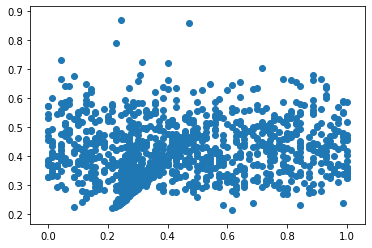

In [40]:
plt.scatter(traindf_Y_test,traindf_X_pred)

In [41]:
mean_squared_error(traindf_Y_test, traindf_X_pred)

0.019235059391550114

In [42]:
mean_absolute_error(traindf_Y_test, traindf_X_pred)

0.05614160572641317

As shown in the graph, our model performs pretty well for all values close to the median. It doesnt perform so well for extreme values

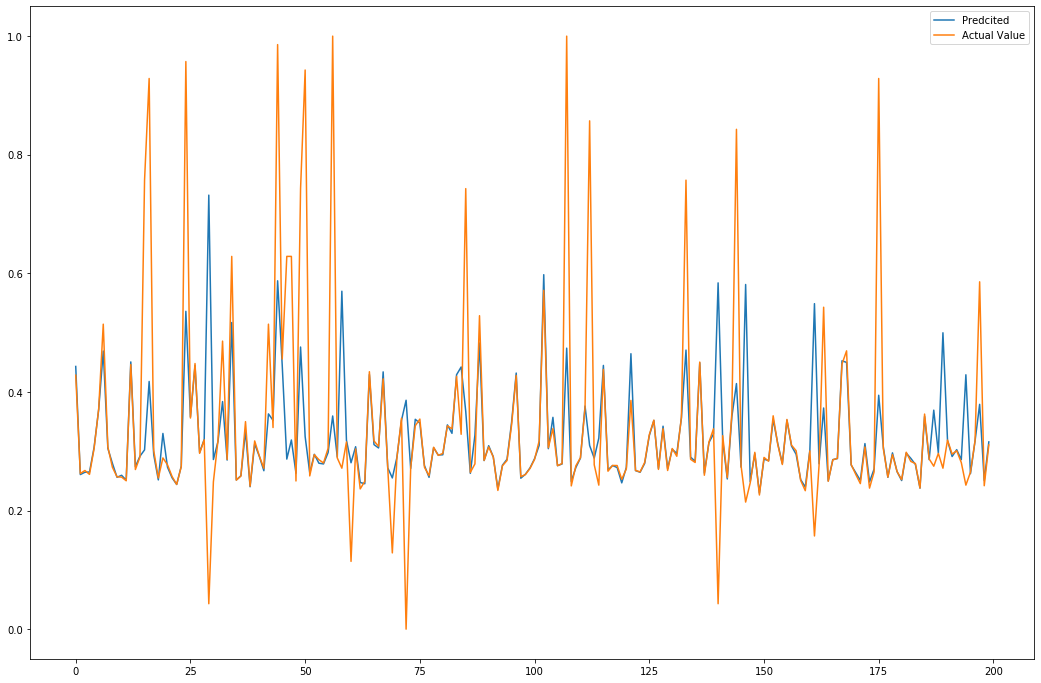

In [43]:
fig,ax = plt.subplots(1,1,figsize = (18,12))
ax.plot(traindf_X_pred[200:400], label = 'Predcited')
ax.plot(traindf_Y_test[200:400], label = 'Actual Value')
ax.legend()


<h1>Preprocessing the Test Dataset</h1>

The preprocessing of the test dataset is done exactly similar to preproccesing of the training dataset, except we dont split the dataset here

In [44]:
testdf.head()

Gender Married  Children Mode_transport  cases/1M  Deaths/1M comorbidity  \
0  Female     YES         2         Public         4          1    Diabetes   
1    Male     YES         2           Walk         4          1    Diabetes   
2  Female     YES         2            Car         4          1    Diabetes   
3  Female     YES         2            Car         4          1        None   
4  Female     YES         2            Car         4          1    Diabetes   

   Age  Coma score Pulmonary score cardiological pressure  Diuresis  \
0   52           3            <200               Stage-01       388   
1   53          11            <200               Stage-01       409   
2   35           9            <100               Stage-02       440   
3   31          12            <300               Elevated       206   
4   51           6            <200               Stage-01       229   

   Platelets  HBB  d-dimer  Heart rate  HDL cholesterol  Charlson Index  \
0        153  196      240          85               53              17   
1         95  138      241          81               61               2   
2         40  166      236          88               47              24   
3         78   83      211          87               52              13   
4        109  207      312          94               68              39   

   Blood Glucose  FT/month  
0              3         1  
1              5         1  
2              3         2  
3              6         2  
4              5         1

In [45]:
testdf_X=testdf.iloc[:,:].values

In [46]:
labelEncoder_X=LabelEncoder()
testdf_X[:,0]=labelEncoder_X.fit_transform(testdf_X[:,0])
testdf_X[:,1]=labelEncoder_X.fit_transform(testdf_X[:,1])
for i in range(len(testdf_X)):
    testdf_X[i,9]=int(testdf_X[i,9][1:])


In [47]:
testdf_X

array([[0, 1, 2, 'Public', 4, 1, 'Diabetes', 52, 3, 200, 'Stage-01', 388,
        153, 196, 240, 85, 53, 17, 3, 1],
       [1, 1, 2, 'Walk', 4, 1, 'Diabetes', 53, 11, 200, 'Stage-01', 409,
        95, 138, 241, 81, 61, 2, 5, 1],
       [0, 1, 2, 'Car', 4, 1, 'Diabetes', 35, 9, 100, 'Stage-02', 440,
        40, 166, 236, 88, 47, 24, 3, 2],
       [0, 1, 2, 'Car', 4, 1, 'None', 31, 12, 300, 'Elevated', 206, 78,
        83, 211, 87, 52, 13, 6, 2],
       [0, 1, 2, 'Car', 4, 1, 'Diabetes', 51, 6, 200, 'Stage-01', 229,
        109, 207, 312, 94, 68, 39, 5, 1],
       [1, 1, 2, 'Walk', 4, 1, 'Diabetes', 34, 14, 300, 'Elevated', 340,
        35, 185, 291, 75, 61, 26, 6, 1],
       [0, 1, 2, 'Car', 4, 1, 'None', 61, 7, 400, 'Normal', 176, 82, 152,
        246, 75, 42, 5, 3, 2],
       [0, 1, 2, 'Walk', 4, 1, 'None', 55, 7, 300, 'Elevated', 287, 117,
        112, 343, 68, 54, 24, 3, 1],
       [0, 1, 2, 'Public', 4, 1, 'Hypertension', 28, 9, 400, 'Normal',
        373, 89, 107, 224, 80, 53, 5, 

In [48]:
data=['Gender', 'Married', 'Children', 'Mode_transport', 'cases/1M',
       'Deaths/1M', 'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'FT/month']

In [49]:
testdf_X=pd.DataFrame(data=testdf_X,columns=data)#we change the traindf_X array back to dataframe to help in One hot encoding

In [50]:
testdf_X.head()

Gender Married Children Mode_transport cases/1M Deaths/1M comorbidity Age  \
0      0       1        2         Public        4         1    Diabetes  52   
1      1       1        2           Walk        4         1    Diabetes  53   
2      0       1        2            Car        4         1    Diabetes  35   
3      0       1        2            Car        4         1        None  31   
4      0       1        2            Car        4         1    Diabetes  51   

  Coma score Pulmonary score cardiological pressure Diuresis Platelets  HBB  \
0          3             200               Stage-01      388       153  196   
1         11             200               Stage-01      409        95  138   
2          9             100               Stage-02      440        40  166   
3         12             300               Elevated      206        78   83   
4          6             200               Stage-01      229       109  207   

  d-dimer Heart rate HDL cholesterol Charlson Index Blood Glucose FT/month  
0     240         85              53             17             3        1  
1     241         81              61              2             5        1  
2     236         88              47             24             3        2  
3     211         87              52             13             6        2  
4     312         94              68             39             5        1

In [51]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

In [52]:
testdf_X['Gender'] = pd.to_numeric(testdf_X['Gender'])
testdf_X['Married'] = pd.to_numeric(testdf_X['Married'])
testdf_X['Children'] = pd.to_numeric(testdf_X['Children'])
testdf_X['cases/1M'] = pd.to_numeric(testdf_X['cases/1M'])
testdf_X['Deaths/1M'] = pd.to_numeric(testdf_X['Deaths/1M'])
testdf_X['Age'] = pd.to_numeric(testdf_X['Age'])
testdf_X['Coma score'] = pd.to_numeric(testdf_X['Coma score'])
testdf_X['Pulmonary score'] = pd.to_numeric(testdf_X['Pulmonary score'])
testdf_X['Diuresis'] = pd.to_numeric(testdf_X['Diuresis'])
testdf_X['Platelets'] = pd.to_numeric(testdf_X['Platelets'])
testdf_X['HBB'] = pd.to_numeric(testdf_X['HBB'])
testdf_X['d-dimer'] = pd.to_numeric(testdf_X['d-dimer'])
testdf_X['Heart rate'] = pd.to_numeric(testdf_X['Heart rate'])
testdf_X['HDL cholesterol'] = pd.to_numeric(testdf_X['HDL cholesterol'])
testdf_X['Charlson Index'] = pd.to_numeric(testdf_X['Charlson Index'])
testdf_X['Blood Glucose'] = pd.to_numeric(testdf_X['Blood Glucose'])
testdf_X['FT/month'] = pd.to_numeric(testdf_X['FT/month'])

In [53]:
print('There were {} columns before encoding categorical features'.format(testdf_X.shape[1]))
testdf_X = oneHotEncode(testdf_X, data)
print('There are {} columns after encoding categorical features'.format(testdf_X.shape[1]))

There were 20 columns before encoding categorical features
There are 28 columns after encoding categorical features


In [54]:
#testdf_X

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()

testdf_X = scaler1.fit_transform(testdf_X)


<h1>Applying the model on the test dataset and storing in an excel file</h1>

In [56]:
testdf_X_pred=NN_model.predict(testdf_X)

In [57]:
#testdf_X_pred

In [60]:
#min1=testdf_X_pred[0][0]
#max1=testdf_X_pred[0][0]
#for i in range(len(testdf_X_pred)):
    #print(testdf_X_pred[i][0])
#    if(min1>testdf_X_pred[i][0]):
#        print("newmin")
#        min1=testdf_X_pred[i][0]
#    if(max1<testdf_X_pred[i][0]):
#        print("newmax")
#        max1=testdf_X_pred[i][0]
#print(min1)
#print(max1)

In [61]:
#for i in range(len(testdf_X_pred)):
#    print((testdf_X_pred[i][0]-min1)/(max1-min1))

We read the test dataset into a temp file so that we can extract all the people_IDs form the dataset which will be used as an input to the new excel file

In [62]:
temp = pd.read_excel("C:/Users/Dell/Desktop/Flipr ML/Test_dataset.xlsx", sheet_name = "Test_dataset")

In [63]:
tempIDs=temp.iloc[:,0].values

In [64]:
#tempIDs

In [65]:
testdf_X_pred.max()

0.8325869

In [66]:
testdf_X_pred = scaler2.inverse_transform(testdf_X_pred)

In [68]:
import xlsxwriter 
  
workbook = xlsxwriter.Workbook('Q1_FliprNeuralNetwork.xlsx') 
worksheet = workbook.add_worksheet() 
  
# Start from the first cell. 
# Rows and columns are zero indexed. 
row = 1
row_id=0
column_id = 0
column=1
  
worksheet.write(0,0,'people_ID')
worksheet.write(0,1,'Infect_prob')
    
# iterating through content list 
for i in range(len(testdf_X_pred)) : 
  
    # write operation perform 
    worksheet.write(row, column_id, tempIDs[i])
    worksheet.write(row, column, testdf_X_pred[i]) 
  
    # incrementing the value of row by one 
    # with each iteratons. 
    row += 1
      
workbook.close() 